In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mp
from scipy.optimize import curve_fit
from scipy.stats import linregress

In [11]:
# Measured data
Delay = np.array([2, 4, 8, 16])
Ch0 = np.array([283, 308, 358, 442])
Ch1 = np.array([141, 159, 201, 282])
Ch2 = np.array([144, 162, 204, 287])
Ch3 = np.array([147, 165, 208, 291])
Ch4 = np.array([139, 157, 199, 281])
Ch5 = np.array([133, 151, 194, 276])
Ch6 = np.array([143, 161, 203, 285])
Ch7 = np.array([132, 151, 192, 275])

channels = np.array([Ch0, Ch1, Ch2, Ch3, Ch4, Ch5, Ch6, Ch7])

# Offset calculation
differences = {}
mean_differences = {}

for i in range(1, channels.shape[0]):
    differences[f'Ch{i} - Ch0'] = channels[i] - channels[0]
    mean_differences[f'Mean of Ch{i} - Ch0'] = np.mean(channels[i] - channels[0])

for key, value in differences.items():
    print(f"{key}: {value}")

for key, value in mean_differences.items():
    print(f"{key}: {value}")

Ch1 - Ch0: [-142 -149 -157 -160]
Ch2 - Ch0: [-139 -146 -154 -155]
Ch3 - Ch0: [-136 -143 -150 -151]
Ch4 - Ch0: [-144 -151 -159 -161]
Ch5 - Ch0: [-150 -157 -164 -166]
Ch6 - Ch0: [-140 -147 -155 -157]
Ch7 - Ch0: [-151 -157 -166 -167]
Mean of Ch1 - Ch0: -152.0
Mean of Ch2 - Ch0: -148.5
Mean of Ch3 - Ch0: -145.0
Mean of Ch4 - Ch0: -153.75
Mean of Ch5 - Ch0: -159.25
Mean of Ch6 - Ch0: -149.75
Mean of Ch7 - Ch0: -160.25


In [19]:
# Substract value at delay = 2 to all others for each channel
subtracted_values = {}

for i in range(channels.shape[0]):
    value_at_delay_2 = channels[i][0]
    
    subtracted = channels[i][1:4] - value_at_delay_2
    
    subtracted_values[f'Ch{i}'] = subtracted

for key, value in subtracted_values.items():
    print(f"{key}: {value}")

Ch0: [ 25  75 159]
Ch1: [ 18  60 141]
Ch2: [ 18  60 143]
Ch3: [ 18  61 144]
Ch4: [ 18  60 142]
Ch5: [ 18  61 143]
Ch6: [ 18  60 142]
Ch7: [ 19  60 143]


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


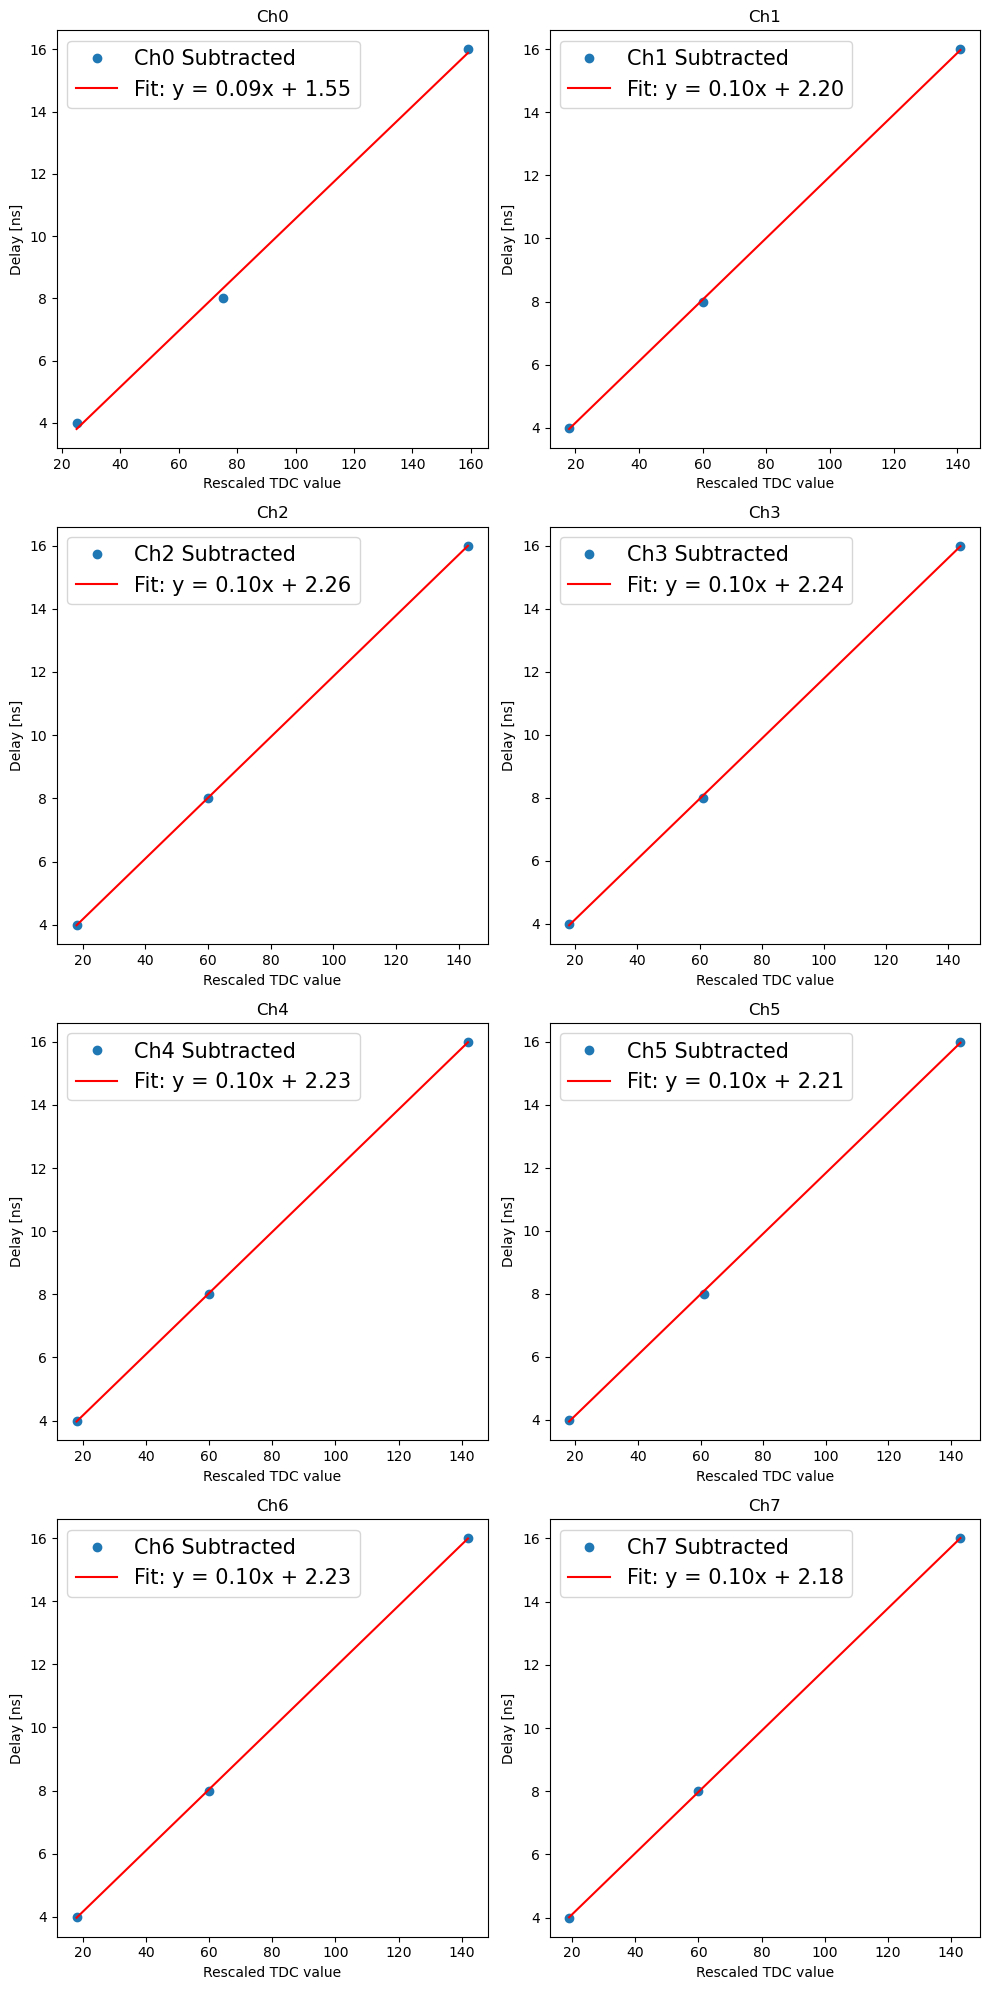

In [28]:
# Plot + linear regression
fig, axs = plt.subplots(4, 2, figsize=(10, 20))
axs = np.array(axs).reshape(2, 4)

for i, (channel_name, subtracted_v) in enumerate(subtracted_values.items()):
    ax = axs[i // 4, i % 4]
    ax.plot(subtracted_v, Delay[1:4],'o', label=f'{channel_name} Subtracted')

    slope, intercept, r_value, p_value, std_err = linregress(subtracted_v, Delay[1:4])

    ax.plot(subtracted_v, slope * subtracted_v + intercept, label=f'Fit: y = {slope:.2f}x + {intercept:.2f}', color='red')

    ax.set_title(f'{channel_name}')
    ax.set_xlabel('Rescaled TDC value')
    ax.set_ylabel('Delay [ns]' )
    ax.legend(fontsize=15)

plt.tight_layout()
plt.savefig('TDC_calibration.png',dpi=500)
plt.show()